<a href="https://www.kaggle.com/code/jesusgraterol/bitcoinweightedaveragetradeprice?scriptVersionId=136310004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bitcoin Weighted Average Trade Price

When trading Bitcoin, stocks or any other asset, it is very common to execute several trades at different prices for different amounts. Therefore, the mean of the prices won't suffice to derive the real entry price. The formula to calculate the weighted average price goes as follows:

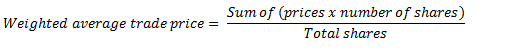

In [1]:
##################
## Dependencies ##
##################

from typing import List, TypedDict
import utilities as utils

In [2]:
###########
## Types ##
###########

# The interface of a trade that will help simplify the calculation
class ITrade(TypedDict):
    # The price at which the trade was executed
    price: float
        
    # The BTC Amount that was longed or shorted
    amount: float

In [3]:
# Entry Price Calculator
def calculate_entry_price(trades: List[ITrade], precision: int = 2) -> float:
  """Calculates the real entry price based on a given list of trades.

  Args:
    trades: List[ITrade]
      The trades that have been executed.
    precision: int
        The number of decimals that should be used for the output.

  Returns:
    float
  """
  # Init values
  prices_times_shares: List[float] = []
  total_shares: float = 0

  # Iterate over each trade
  for trade in trades:
    # Append the price times shares value
    prices_times_shares.append(trade["price"] * trade["amount"])

    # Add the shares aquired
    total_shares += round(trade["amount"], 8)

  # Finally, calculate the real entry price and return it
  return round(sum(prices_times_shares) / total_shares, precision)

In [4]:
# Init a list of trades and calculate the entry price
entry_price: float = calculate_entry_price([
    { "price": 27340.15, "amount": 0.01 },
    { "price": 22077.21, "amount": 0.03 },
    { "price": 21175.76, "amount": 0.08 },
])
print(utils.currency(entry_price))

21,914.82$
